In [9]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)

# Custom package
library(rutils)

In [10]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [11]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320

In [12]:
intra_figs <- list()
inter_figs <- load(paste0(dirs$figures_dir, "/saved_obj/gene_interplots.RData"))

for (idx in 1:3) {
    intra_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_intraplots.RData"))
}
intra_figs <- Reduce(c, intra_figs)

In [13]:
inter_figs
intra_figs

[1] "demg_inter"  "umsmg_inter" "nsmg_inter"

[1] "CESC_intra" "UCS_intra"  "UCEC_intra"

In [14]:
inter_figs_list <- c(
    mget("demg_inter"),
    mget("umsmg_inter"),
    mget("nsmg_inter")
)
intra_figs_list <- c(
    mget("CESC_intra"),
    mget("UCEC_intra"),
    mget("UCS_intra")
)

In [15]:
n_cesc_intra <- 825
n_ucec_intra <- 748
n_ucs_intra <- 720

n_demg <- 839
n_figo <- 476
n_surv <- 76

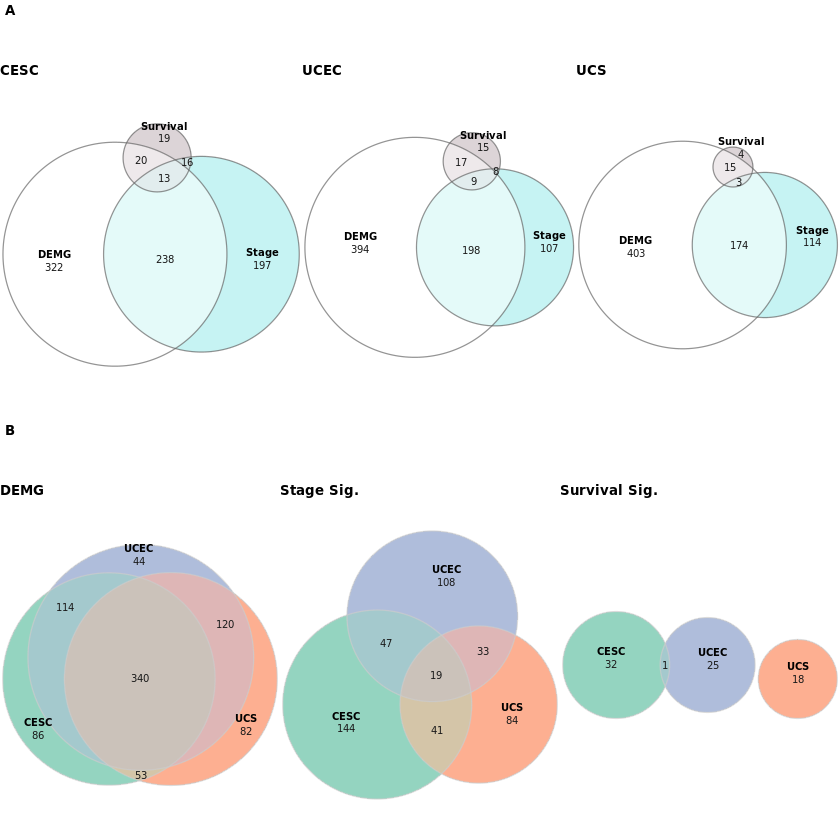

In [17]:
fig6 <- plot_grid(
    plot_grid(NULL, labels = c("A"), label_size = label_text_size),
    plot_grid(
        CESC_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        UCEC_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        UCS_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        nrow = 1,
        # Proportional sizes
        rel_widths = c(n_cesc_intra, n_ucec_intra, n_ucs_intra),
        labels = c("CESC", "UCEC", "UCS"),
        vjust = 0.5,
        hjust = 0,
        label_size = text_size
    ),
    plot_grid(NULL, labels = c("B"), label_size = label_text_size),
    plot_grid(
        demg_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        umsmg_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        nsmg_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        nrow = 1,
        # Proportional sizes
#         rel_widths = c(n_demg, n_figo, n_surv),
        labels = c("DEMG", "Stage Sig.", "Survival Sig."),
        vjust = 0.5,
        hjust = 0,
        label_size = text_size,
        label_fontfamily = family
    ),
    nrow = 4,
    rel_heights = c(0.2, 1, 0.2, 1),
    label_size = label_text_size,
    label_fontfamily = family
)

fig6

In [18]:
ggsave(fig6, filename = paste0(dirs$figures_dir, "/paneled/figure6.png"), dpi = dpi, height = 4, width = 5.5)